# Introduction to Matplotlib

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

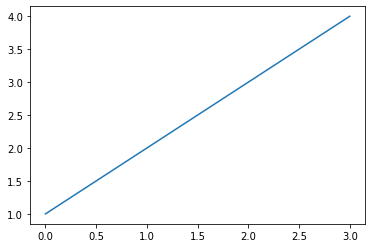

In [2]:
plt.plot([1,2,3,4]);

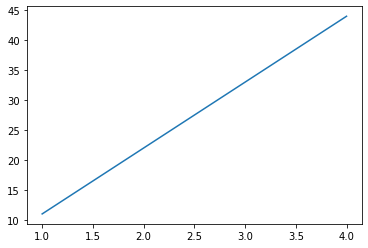

In [3]:
x=[1,2,3,4]
y=[11,22,33,44]
plt.plot(x,y);

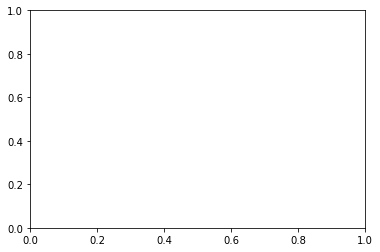

In [5]:
# 1st method
fig=plt.figure() #creates a figure
ax = fig.add_subplot() # adds some axes
plt.show()

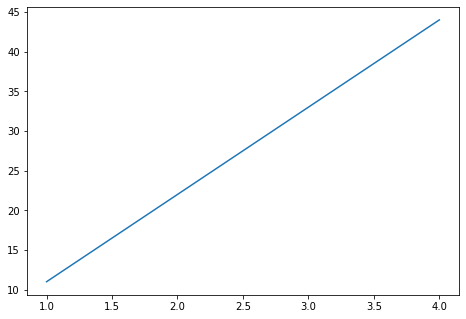

In [6]:
# 2nd method
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.plot(x,y)
plt.show()

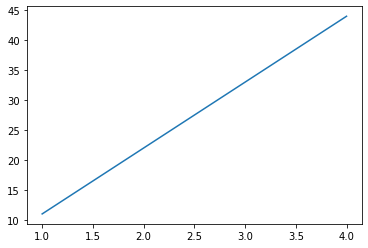

In [7]:
# 3rd method (reccommended)
fig,ax = plt.subplots()
ax.plot(x,y); #add some data 

## Matplot example workflow

[Text(0.5, 1.0, 'Simple plot'), Text(0.5, 0, 'x-axis'), Text(0, 0.5, 'y-axis')]

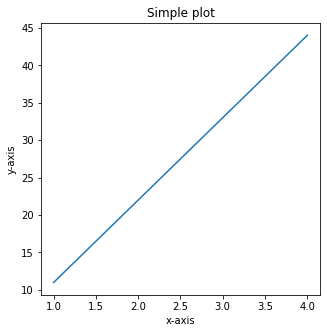

In [11]:
# 0. import matplotlib and get it ready for plotting in Jupyter
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1,2,3,4]
y = [11,22,33,44]

# 2. Setup plot
fig,ax = plt.subplots(figsize=(5,5))

# 3. Plot data
ax.plot(x,y)

# 4. Customize plot
ax.set(title="Simple plot",
      xlabel="x-axis",
      ylabel="y-axis")

# 5. save and show (you save the whole figure)
#fig.savefig("insert directory")

## Making figure with NumPy arrays

We want:
* Line plot
* scatter plot
* bar plot
* histogram
* subplots

In [13]:
# Create some data
x=np.linspace(0,10,100)

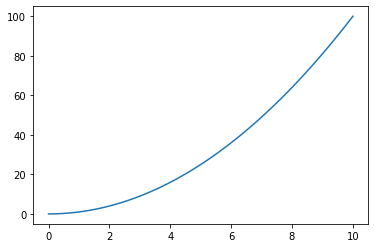

In [15]:
# Plot the data
fig,ax = plt.subplots()
ax.plot(x,x**2);

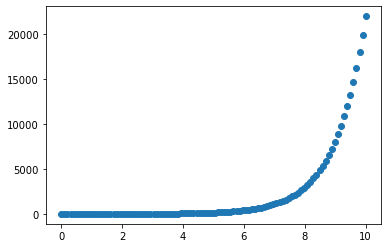

In [17]:
# use same data to make a scatter plot
fig,ax = plt.subplots()
ax.scatter(x,np.exp(x));

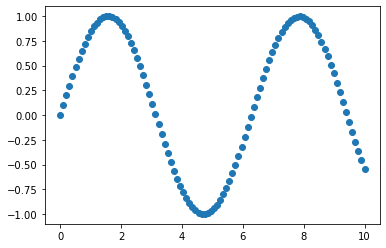

In [18]:
# another scatter plot
fig,ax = plt.subplots()
ax.scatter(x,np.sin(x));

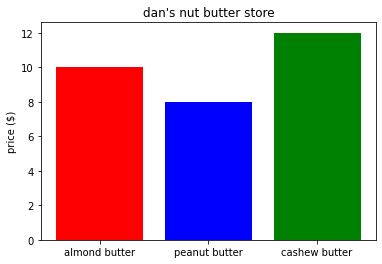

In [28]:
# make a plot from dictionary
nut_butter_prices = {"almond butter":10,
                    "peanut butter":8,
                    "cashew butter":12}
fig,ax = plt.subplots()
colors = ["red","blue","green"]
ax.bar(nut_butter_prices.keys(),nut_butter_prices.values(),color=colors)
ax.set(title = "dan's nut butter store",
      ylabel = "price ($)");


<BarContainer object of 3 artists>

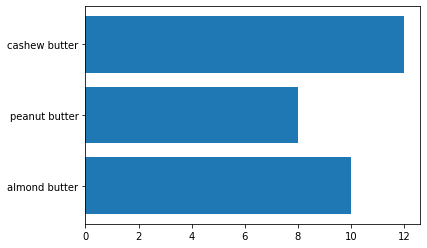

In [29]:
fig,ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()),list(nut_butter_prices.values()))

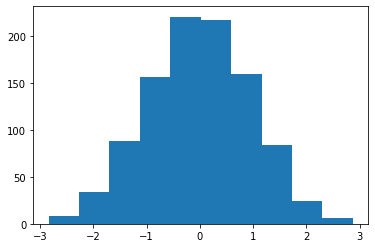

In [34]:
# make some data for histograms and plot it
x=np.random.randn(1000) #returns random numbers 1000 of them from a normal distribution
fig,ax = plt.subplots()
ax.hist(x);

# Two options for subplots

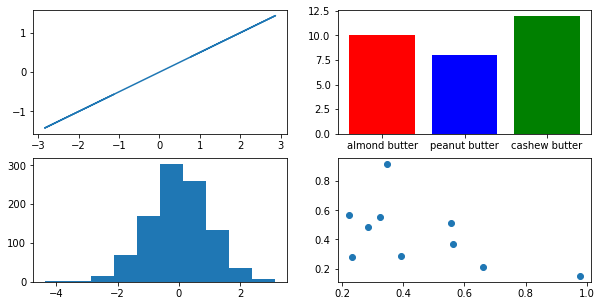

In [42]:
# subplot option 1
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,
                                        ncols=2,
                                        figsize=(10,5))
ax1.plot(x,x/2)
ax2.bar(nut_butter_prices.keys(),nut_butter_prices.values(),color=colors)
ax3.hist(np.random.randn(1000))
ax4.scatter(np.random.random(10),np.random.random(10))

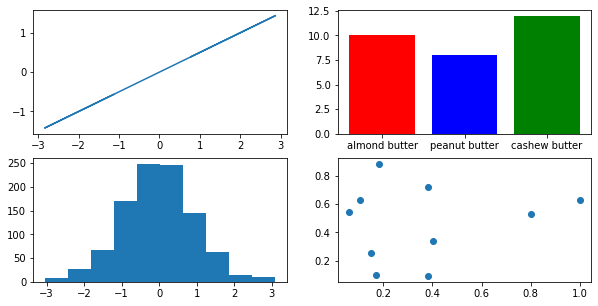

In [45]:
# subplots option 2
fig,ax = plt.subplots(nrows=2,
                     ncols=2,
                     figsize=(10,5))

# plot to each different axis index
ax[0,0].plot(x,x/2);
ax[0,1].bar(nut_butter_prices.keys(),nut_butter_prices.values(),color=colors)
ax[1,0].hist(np.random.randn(1000))
ax[1,1].scatter(np.random.random(10),np.random.random(10))

## Plotting from pandas dataframes

In [46]:
import pandas as pd

In [51]:
# make a dataframe
car_sales = pd.read_csv("car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [52]:
# Start with some dummy data
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2024', periods=1000))

# Note: ts = short for time series (data over time)
ts

2024-01-01    0.272228
2024-01-02    0.254361
2024-01-03   -0.824991
2024-01-04    0.290279
2024-01-05   -1.208677
                ...   
2026-09-22    2.108863
2026-09-23    0.659072
2026-09-24   -0.882299
2026-09-25   -0.673455
2026-09-26    0.585604
Freq: D, Length: 1000, dtype: float64

In [53]:
# Add up the values cumulatively
ts.cumsum()

2024-01-01     0.272228
2024-01-02     0.526589
2024-01-03    -0.298402
2024-01-04    -0.008123
2024-01-05    -1.216800
                ...    
2026-09-22     9.369863
2026-09-23    10.028935
2026-09-24     9.146636
2026-09-25     8.473182
2026-09-26     9.058785
Freq: D, Length: 1000, dtype: float64

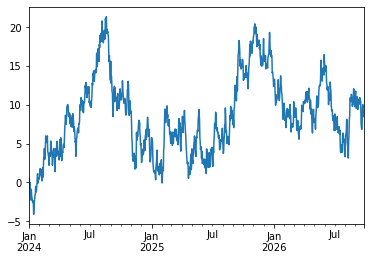

In [54]:
# Plot the values over time with a line plot (note: both of these will return the same thing)
# ts.cumsum().plot() # kind="line" is set by default
ts.cumsum().plot(kind="line");

In [55]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [58]:
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]','')
car_sales

C:\Users\steph\AppData\Local\Temp\ipykernel_12980\4215731511.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]','')


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [60]:
# remove the last 2 zeros
type(car_sales["Price"][0])
# the column is still a string see below output

str

In [61]:
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [63]:
car_sales["Sale Date"] = pd.date_range("1/1/2020",periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2020-01-01
1,Honda,Red,87899,4,5000,2020-01-02
2,Toyota,Blue,32549,3,7000,2020-01-03
3,BMW,Black,11179,5,22000,2020-01-04
4,Nissan,White,213095,4,3500,2020-01-05
5,Toyota,Green,99213,4,4500,2020-01-06
6,Honda,Blue,45698,4,7500,2020-01-07
7,Honda,Blue,54738,4,7000,2020-01-08
8,Toyota,White,60000,4,6250,2020-01-09
9,Nissan,White,31600,4,9700,2020-01-10


In [67]:
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


In [69]:
type(car_sales["Price"].astype(int)[0]) #price is still a string

numpy.int32

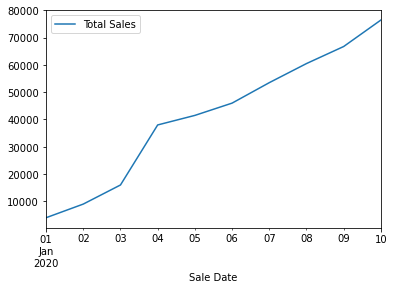

In [73]:
# lets plot the total sales

car_sales.plot(x="Sale Date",
              y="Total Sales");

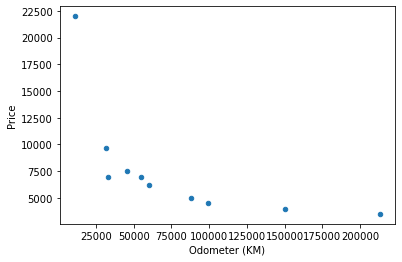

In [76]:
car_sales["Price"] = car_sales["Price"].astype(int)
car_sales.plot(x="Odometer (KM)",y="Price",kind="scatter");

In [77]:
# how about a bar graph
x=np.random.rand(10,4)
x

#turn it into a dataframe
df=pd.DataFrame(x,columns=['a','b','c','d'])
df

,a,b,c,d
0,0.532871,0.294173,0.861258,0.658568
1,0.109176,0.775718,0.102845,0.470484
2,0.519094,0.772026,0.934761,0.941796
3,0.967492,0.631034,0.598262,0.844107
4,0.691339,0.316062,0.436459,0.501977
5,0.989527,0.513371,0.820807,0.486025
6,0.780409,0.371687,0.334535,0.984677
7,0.814565,0.528852,0.626893,0.298092
8,0.400101,0.621758,0.592959,0.846986
9,0.378835,0.455878,0.985624,0.983550


<AxesSubplot:>

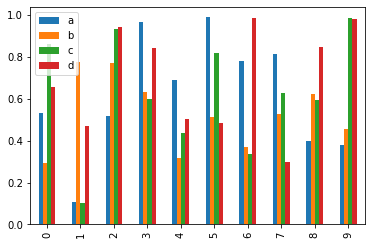

In [78]:
df.plot.bar()

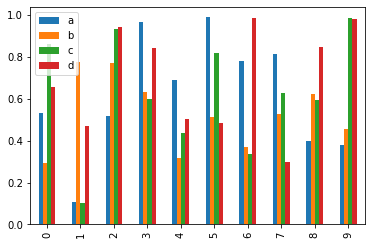

In [80]:
df.plot(kind='bar');

<AxesSubplot:xlabel='Make'>

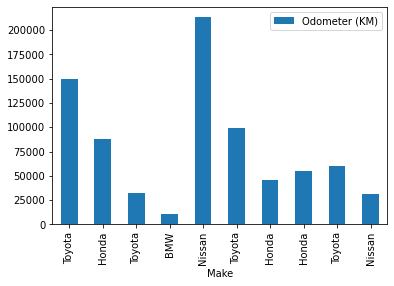

In [82]:
car_sales.plot(x="Make",
              y="Odometer (KM)",
              kind="bar")

In [83]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


In [88]:
odometer_grouped_df = car_sales.groupby('Make')['Odometer (KM)'].mean()
odometer_grouped_df

Make
BMW        11179.000000
Honda      62778.333333
Nissan    122347.500000
Toyota     85451.250000
Name: Odometer (KM), dtype: float64

In [90]:
average_odometer = pd.DataFrame({"Avg Odometer (KM)":odometer_grouped_df})
average_odometer

,Avg Odometer (KM)
Make,
BMW,11179.000000
Honda,62778.333333
Nissan,122347.500000
Toyota,85451.250000


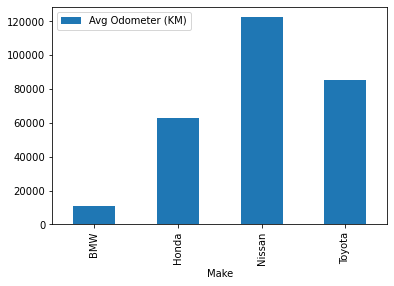

In [94]:
average_odometer.plot(
              y="Avg Odometer (KM)",
              kind="bar");

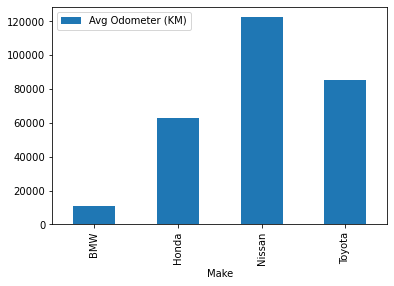

In [95]:
average_odometer.plot(kind='bar');

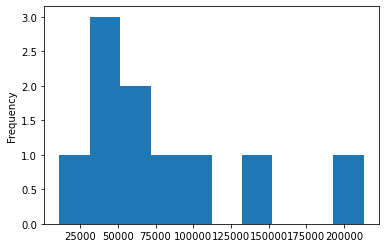

In [97]:
# how about histograms (great for distributions)
car_sales["Odometer (KM)"].plot.hist();

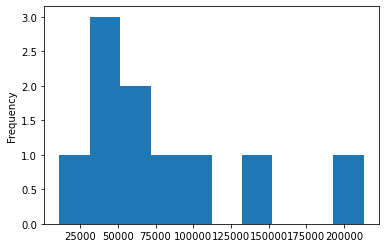

In [102]:
car_sales["Odometer (KM)"].plot.hist(bins=10);

In [105]:
# lets try on another dataset
heart_disease = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


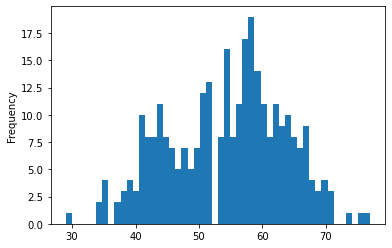

In [111]:
# create a histogram
heart_disease["age"].plot.hist(bins=50);

In [112]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


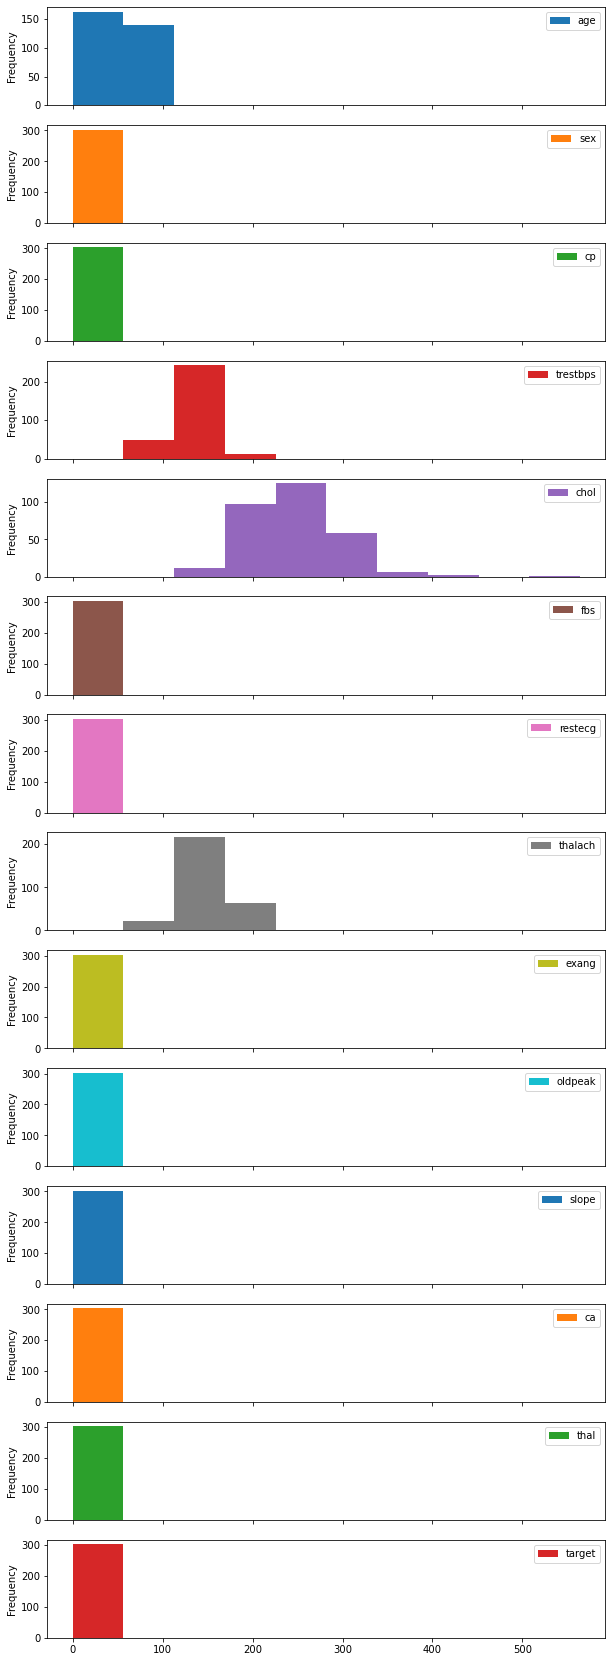

In [114]:
heart_disease.plot.hist(figsize=(10,30),subplots=True);

### Which one should you use (pyplot vs matplotlib OO method)

* when plotting quickly it is okay to use the pyplot method
* when plotting something more advanced use the OO method

In [115]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [118]:
over_50 = heart_disease[heart_disease["age"]>50]
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


In [120]:
over_50.shape

(208, 14)

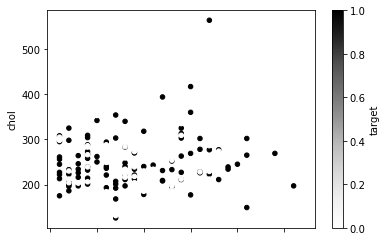

In [121]:
# pyplot method
over_50.plot(kind="scatter",
            x="age",
            y="chol",
            c="target");

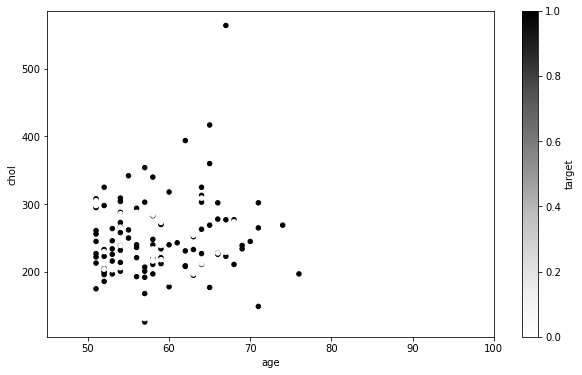

In [131]:
# OO method
fig,ax = plt.subplots(figsize=(10,6))
over_50.plot(kind='scatter',
            x='age',
            y='chol',
            c='target',
            ax=ax);
ax.set_xlim([45,100]);

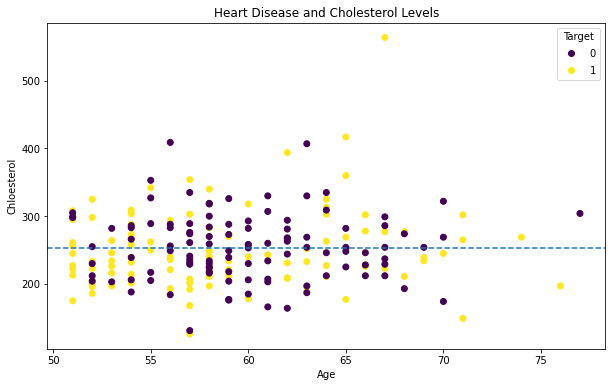

In [137]:
# OO method from scratch
fig,ax = plt.subplots(figsize=(10,6))

# plot the data
scatter = ax.scatter(x=over_50["age"],
                    y=over_50["chol"],
                    c=over_50["target"])

# customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
      xlabel = "Age",
      ylabel = "Chloesterol");

# add a legend
ax.legend(*scatter.legend_elements(),title="Target");

# add a horizontal line
ax.axhline(over_50["chol"].mean(),
          linestyle = 'dashed')

In [138]:
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


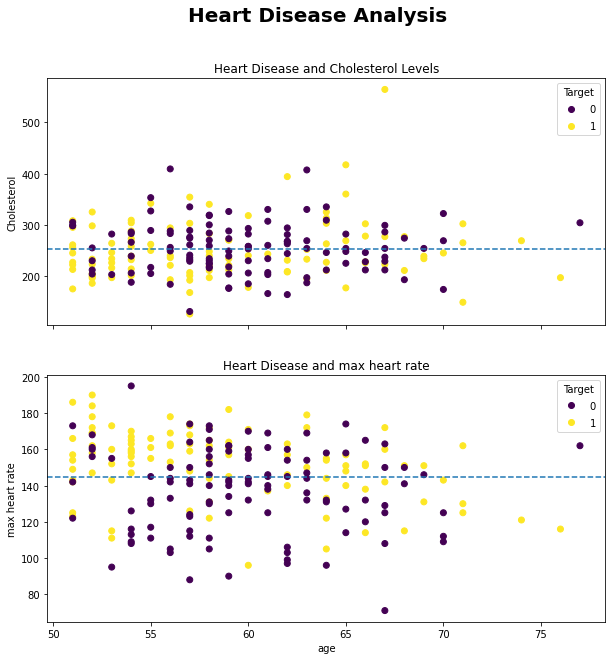

In [152]:
# subplot of chol,age,thalach
fig,(ax0,ax1) = plt.subplots(nrows=2,
                             ncols=1,
                             figsize = (10,10),
                            sharex=True)

#ax0 subplot
scatter = ax0.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"])
ax0.set(title="Heart Disease and Cholesterol Levels",
       #xlabel = "Age",
       ylabel="Cholesterol")
ax0.legend(*scatter.legend_elements(),title="Target")
ax0.axhline(y=over_50["chol"].mean(),
           linestyle="dashed");

#ax1 subplot
scatter = ax1.scatter(x=over_50["age"],
                     y=over_50["thalach"],
                     c=over_50["target"])
ax1.set(title="Heart Disease and max heart rate",
       xlabel='age',
       ylabel='max heart rate');
ax1.legend(*scatter.legend_elements(),title="Target")
ax1.axhline(y=over_50["thalach"].mean(),
           linestyle = 'dashed');

# add a title to the figure
fig.suptitle("Heart Disease Analysis",fontsize=20,fontweight="bold");

## customizing matplotlib plots and getting stylish

In [155]:
# see the different styles available
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

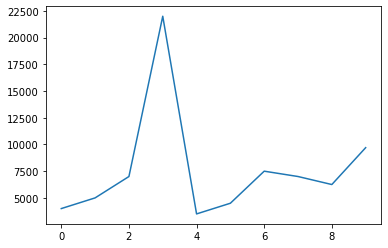

In [157]:
car_sales['Price'].plot();

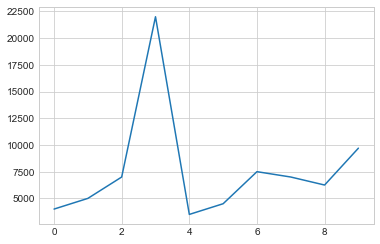

In [159]:
plt.style.use('seaborn-whitegrid')
car_sales['Price'].plot();

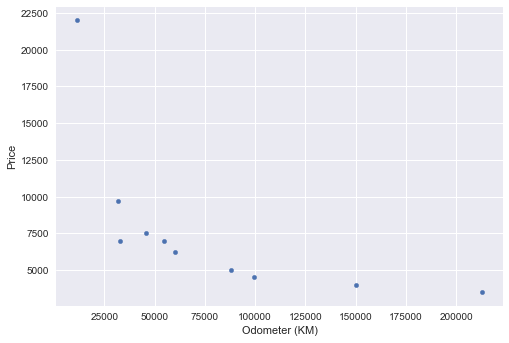

In [163]:
plt.style.use('seaborn')
car_sales.plot(x="Odometer (KM)",y="Price",kind='scatter' );

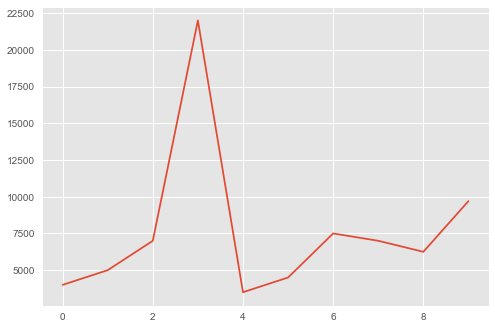

In [164]:
plt.style.use('ggplot')
car_sales["Price"].plot();

In [165]:
# create some data
x = np.random.randn(10,4)

In [168]:
df=pd.DataFrame(x,columns=['a','b','c','d'])
df

,a,b,c,d
0,-0.306342,-0.064774,-0.971991,-0.526390
1,-1.845346,0.132618,-0.743098,-1.515191
2,0.230009,2.502300,-1.185053,1.904179
3,-1.825756,0.199128,0.702819,0.896378
4,-2.119431,-0.281547,-1.502311,0.183963
5,0.369057,-0.434652,0.478153,0.241213
6,-0.473289,-0.071861,1.163058,-0.546556
7,0.621150,-2.043614,0.561320,-0.406428
8,-0.695102,-1.838616,0.869170,0.252665
9,-0.476559,-0.449188,0.114658,0.511531


matplotlib.axes._subplots.AxesSubplot

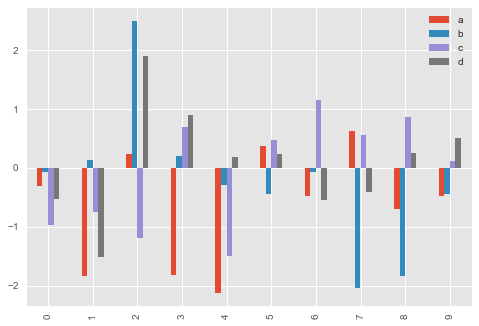

In [171]:
ax = df.plot(kind='bar')
type(ax)

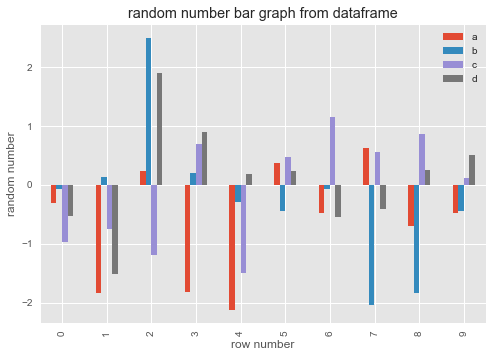

In [172]:
# customize our plot with the set() method
ax = df.plot(kind='bar')

# add some labels and a title
ax.set(title='random number bar graph from dataframe',
      xlabel='row number',
      ylabel='random number')

# make the legend visible
ax.legend().set_visible(True)

# The final heartdisease dataset figure

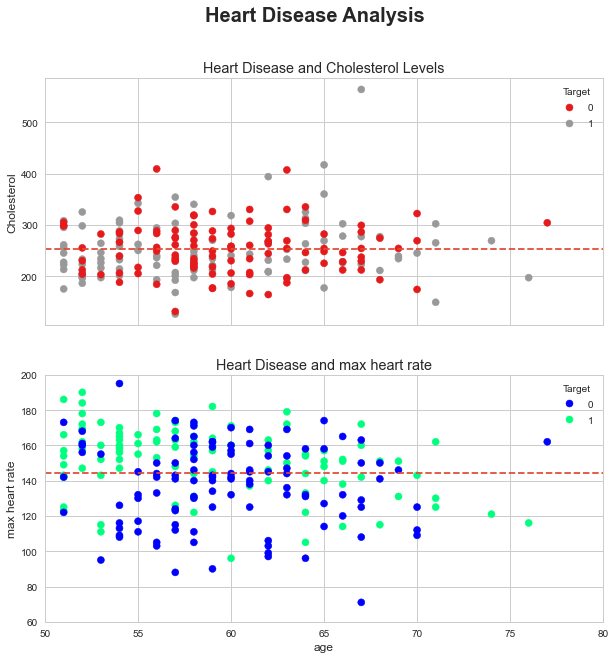

In [190]:
#set the style
plt.style.use('seaborn-whitegrid')

# subplot of chol,age,thalach
fig,(ax0,ax1) = plt.subplots(nrows=2,
                             ncols=1,
                             figsize = (10,10),
                            sharex=True)

#ax0 subplot
scatter = ax0.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"],
                     cmap = 'Set1')
ax0.set(title="Heart Disease and Cholesterol Levels",
       #xlabel = "Age",
       ylabel="Cholesterol")
ax0.set_xlim([50,80])
ax0.legend(*scatter.legend_elements(),title="Target")
ax0.axhline(y=over_50["chol"].mean(),
           linestyle="dashed");

#ax1 subplot
scatter = ax1.scatter(x=over_50["age"],
                     y=over_50["thalach"],
                     c=over_50["target"],
                     cmap = 'winter')
ax1.set(title="Heart Disease and max heart rate",
       xlabel='age',
       ylabel='max heart rate');
ax1.set_ylim([60,200])
ax1.legend(*scatter.legend_elements(),title="Target")
ax1.axhline(y=over_50["thalach"].mean(),
           linestyle = 'dashed');

# add a title to the figure
fig.suptitle("Heart Disease Analysis",fontsize=20,fontweight="bold");

In [ ]:
fig.savefig('insert name')